In [1]:
using JuMP, Gurobi, CSV, DataFrames,LinearAlgebra, Random, CategoricalArrays,Statistics, Plots

In [2]:
#outcome = CSV.read("outcomes_with_binary.csv")[:,13:18];
#outcome = CSV.read("selectedY.csv") |> DataFrame
#feature = CSV.read("selectedfeatures.csv")[:,2:end] |> DataFrame;
outcome = CSV.read("C:\\Users\\Sofiane\\Documents\\MIT\\Cours\\15.095 ML\\Project\\ML project\\Data\\selectedY.csv") |> DataFrame
feature = CSV.read("C:\\Users\\Sofiane\\Documents\\MIT\\Cours\\15.095 ML\\Project\\ML project\\Data\\selectedfeatures.csv")[:,2:end] |> DataFrame;

### We define variables of times and outcome for optimal survival tree

In [3]:
time_sentence_to_arrest = outcome[:V124];
recidivism = outcome[:V127];

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:1
└ @ Core In[3]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[3]:2
└ @ Core In[3]:2


#### Filtering data and wrongly coded values

In [4]:
recidivism_filtered = map( x -> begin
        if ismissing(x)
            return missing
        elseif x==8
            return missing
        else
            return x
        end
        end,recidivism);

In [5]:
##9998 : not ascertained, vraiment missing
## 9999 : ,ot applicable(mais pas cohérent avec V104 = nombre d ejours depuis année 1900)
#j'ai gardé 9999 as bigger than everything

time_sentence_to_arrest_filtered = map( x -> begin
        if ismissing(x)
            return missing
        elseif x==9998 #x==9999||
            return missing
        else
            return x
        end
    
        end,time_sentence_to_arrest);

In [6]:

for i=1:length(recidivism_filtered)
    if ( ismissing(recidivism_filtered[i])) || (ismissing(time_sentence_to_arrest_filtered[i]))
        #print("hey")
    elseif (recidivism_filtered[i]==1) && (time_sentence_to_arrest_filtered[i]==9999 )
        time_sentence_to_arrest_filtered[i]=missing
    end
end

In [7]:
indexes = .!(ismissing.(time_sentence_to_arrest_filtered));
time_sentence_to_arrest_filtered=time_sentence_to_arrest_filtered[indexes]
recidivism_filtered = recidivism_filtered[indexes]
feature = feature[indexes,:];


In [8]:
indexes = .!(ismissing.(recidivism_filtered))
time_sentence_to_arrest_filtered=time_sentence_to_arrest_filtered[indexes]
recidivism_filtered = recidivism_filtered[indexes]
feature = feature[indexes,:];

recidivism_filtered=Int.(recidivism_filtered)
time_sentence_to_arrest_filtered=Int.(time_sentence_to_arrest_filtered)

9695-element Array{Int64,1}:
 9999
 9999
 9999
 9999
 9999
 9999
 9999
 9999
  268
 9999
 9999
  688
 9999
    ⋮
 9999
 9999
 9999
  673
 9999
 9999
 9999
 9999
 9999
   19
 9999
 9999

In [9]:
recidivism_filtered =Bool.(recidivism_filtered)

9695-element BitArray{1}:
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 ⋮
 0
 0
 0
 1
 0
 0
 0
 0
 0
 1
 0
 0

In [10]:
#categorize the cogent columns
feature[:,:V6] = CategoricalArray(feature[:,:V6])
feature[:,:V8] = CategoricalArray(feature[:,:V8])
feature[:,:V9] = CategoricalArray(feature[:,:V9])
feature[:,:V10] = CategoricalArray(feature[:,:V10])
feature[:,:V12] = CategoricalArray(feature[:,:V12])
feature[:,:V13] = CategoricalArray(feature[:,:V13])
feature[:,:V15] = CategoricalArray(feature[:,:V15])
feature[:,:V16] = CategoricalArray(feature[:,:V16])
feature[:,:V17] = CategoricalArray(feature[:,:V17])
feature[:,:V20] = CategoricalArray(feature[:,:V20])
feature[:,:V25] = CategoricalArray(feature[:,:V25])
feature[:,:V26] = CategoricalArray(feature[:,:V26])
feature[:,:V27] = CategoricalArray(feature[:,:V27])
feature[:,:V28] = CategoricalArray(feature[:,:V28])
feature[:,:V30] = CategoricalArray(feature[:,:V30])
feature[:,:V31] = CategoricalArray(feature[:,:V31])
feature[:,:V32] = CategoricalArray(feature[:,:V32])
feature[:,:V33] = CategoricalArray(feature[:,:V33])
feature[:,:V34] = CategoricalArray(feature[:,:V34])
feature[:,:V35] = CategoricalArray(feature[:,:V35])
feature[:,:V36] = CategoricalArray(feature[:,:V36])
feature[:,:V37] = CategoricalArray(feature[:,:V37])
feature[:,:V38] = CategoricalArray(feature[:,:V38])
feature[:,:V39] = CategoricalArray(feature[:,:V39])
feature[:,:V40] = CategoricalArray(feature[:,:V40])
feature[:,:V63] = CategoricalArray(feature[:,:V63])
feature[:,:V113] = CategoricalArray(feature[:,:V113])
feature[:,:V114] = CategoricalArray(feature[:,:V114])
feature[:,:V130] = CategoricalArray(feature[:,:V130])
feature[:,:V134] = CategoricalArray(feature[:,:V134])
feature[:,:V136] = CategoricalArray(feature[:,:V136]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[10]:1
└ @ Core In[10]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[10]:3
└ @ Core In[10]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[10]:4
└ @ Core In[10]:4
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[10]:5
└ @ Core In[10]:5
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `

In [11]:
##Remove variables too obvious for survival
deletecols!(feature,:V111) #risk score
deletecols!(feature,:V24); #Number of felony arrests during supervision 

┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = top-level scope at In[11]:1
└ @ Core In[11]:1
┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = top-level scope at In[11]:3
└ @ Core In[11]:3


In [14]:
deletecols!(feature,:V34); #Status of compliance with drug treatment


#corriger plein de variables encore

┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1


In [15]:
grid_survival = IAI.GridSearch(
    IAI.OptimalTreeSurvivor(
        random_seed=1,
        missingdatamode=:separate_class,
        criterion=:localfulllikelihood,
    ),
    max_depth=1:5,
)
IAI.fit!(grid_survival, feature, recidivism_filtered, time_sentence_to_arrest_filtered,
         validation_criterion=:integratedbrier)
IAI.get_learner(grid_survival)

Training trees...100%|██████████████████████████████████| Time: 0:00:06
Training trees...100%|██████████████████████████████████| Time: 0:00:16
Training trees...100%|██████████████████████████████████| Time: 0:00:34
Training trees...100%|██████████████████████████████████| Time: 0:00:58
Training trees...100%|██████████████████████████████████| Time: 0:01:37
Training trees...100%|██████████████████████████████████| Time: 0:01:16


Fitted OptimalTreeSurvivor:
  1) Split: V122 < 0.5
    2) Split: V130 in [11,15,16,20,21,22,23,25,26,27,28,31,32]
      3) Split: V47 < 0.5
        4) Split: V8 in [100,110,130,200,210,220,400,430,600,720,730,800,810,820,850,860,870,880,998] or is missing
          5) : 72.67% censored, 944 points, error 557.2
          6) : 50.59% censored, 1020 points, error 804.2
        7) Split: V8 in [100,110,130,200,210,220,310,400,430,520,530,700,710,720,730,800,810,840,860,870,880,998] or is missing
          8) : 90.69% censored, 548 points, error 176.9
          9) : 68.28% censored, 186 points, error 109.4
      10) Split: V10 in [1] or is missing
        11) Split: V30 in [3]
          12) : 52.38% censored, 21 points, error 12.51
          13) : 97.47% censored, 950 points, error 101.5
        14) Split: V130 in [1,2,3,4,6,8,10,13,19,24] or is missing
          15) : 83.48% censored, 1047 points, error 414.6
          16) : 93.17% censored, 835 points, error 197.4
    17) Split: V122 < 55.5
      18) Split: V130 in [2,3,4,5,6,7,8,9,10,12,13,14,17,18,19,24,29,30]
        19) Split: V130 in [2,3,5,6,8,10,13,14,18,24] or is missing
          20) : 72.67% censored, 889 points, error 482.5
          21) : 88.61% censored, 439 points, error 139.1
        22) Split: V8 in [100,110,130,200,210,220,310,400,430,800,810,860,870] or is missing
          23) : 58.98% censored, 412 points, error 278.3
          24) : 39.05% censored, 1493 points, error 1185.1
      25) Split: V130 in [1,2,3,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,24,31] or is missing
        26) : 98.79% censored, 578 points, error 32.71
        27) : 85.29% censored, 333 points, error 141

#### We look at the predictions made for points of the dataset

In [17]:
pred_curves = IAI.predict(grid_survival, feature);

In [19]:
#vector_pred_3years = zeros(nrow(feature));

In [83]:
pred_recidivism_final = [ (IAI.get_survival_curve_data(pred_curves[i]))[:coefs][929] for i=1:nrow(feature)];

In [42]:
dic1 =IAI.get_survival_curve_data(pred_curves[5600])
dic1[:coefs][2000]

BoundsError: BoundsError: attempt to access 1042-element Array{Float64,1} at index [2000]

In [193]:
cumprod(IAI.get_survival_curve_data(pred_curves[1])[:coefs][2:1041])

1040-element Array{Float64,1}:
 0.00015169902912620659
 4.602519087566735e-8  
 2.0945930313561238e-11
 1.2709909170849678e-14
 9.640404407500828e-18 
 1.023707992301315e-20 
 1.2423640683267811e-23
 3.5180212290807126e-26
 1.2808329717527057e-28
 6.217635785207307e-31 
 3.772837248305368e-33 
 2.976145887619514e-35 
 2.8894620268150607e-37
 ⋮                     
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   
 0.0                   

In [ ]:
# attention, IAI.get_survival_curve_data(pred_curves[1])[:times][929] = 1094, apres on va trop loin (9999) en temps d'arret

In [90]:
function esperance_stopping_time(i) 
    esp=0
    dico =IAI.get_survival_curve_data(pred_curves[i])
    times = dico[:times]
    coefs = dico[:coefs]
    n = length(times)
    for i=2:929
        esp += times[i]*(coefs[i]-coefs[i-1])
    end
    return esp
end

esperance_stopping_time (generic function with 1 method)

In [96]:
vect_esperance_stopping_time = [esperance_stopping_time(i) for i=1:nrow(feature)];

In [123]:
function recidiv_and_cost(i,threshold)
        p = pred_recidivism_final[i]
        if (p>threshold) 
            cost=3*365*94  
            recidiv=0
        else
            cost = (3*365- vect_esperance_stopping_time[i])*94
            recidiv = p
    end
    return (recidiv,cost)
end

recidiv_and_cost (generic function with 1 method)

In [129]:
function pareto(threshold) 
    n=nrow(feature)# number of individuals
    vect_recidiv_cost = [recidiv_and_cost(i,threshold) for i=1:n]
    total_cost = sum(vect_recidiv_cost[i][2] for i=1:n)
    rate_recidiv = sum(vect_recidiv_cost[i][1] for i=1:n)/n
    return (rate_recidiv,total_cost)
end

pareto (generic function with 1 method)

In [149]:
vect_threshold =collect(0:.01:1)

101-element Array{Float64,1}:
 0.0 
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1 
 0.11
 0.12
 ⋮   
 0.89
 0.9 
 0.91
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0 

In [154]:
vect_pareto = [pareto(vect_threshold[i]) for i=1:length(vect_threshold)];
x=[vect_pareto[i][1] for i in 1:101]
y=[vect_pareto[i][2] for i in 1:101]

101-element Array{Real,1}:
 997906350                  
         9.975815462416033e8
         9.975815462416033e8
         9.964259749490012e8
         9.964259749490012e8
         9.964259749490012e8
         9.964259749490012e8
         9.938650859441719e8
         9.938650859441719e8
         9.916704169927044e8
         9.916704169927044e8
         9.892447728107064e8
         9.892447728107064e8
         ⋮                  
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8
         9.009174484580809e8

In [159]:
LinearAlgebra.normalize(y);

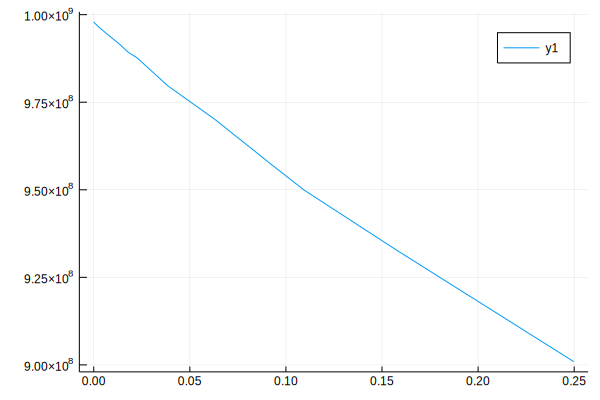

In [161]:
plot(x,y)

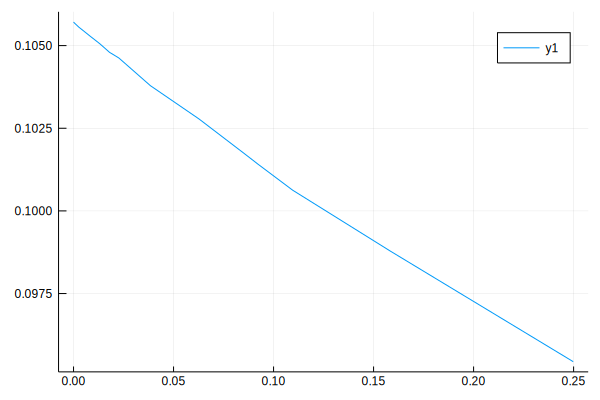

In [160]:
plot(x,LinearAlgebra.normalize(y))

In [55]:
IAI.get_survival_curve_data(pred_curves[1])

Dict{Symbol,Array{Float64,1}} with 2 entries:
  :times => [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 10.0, 11.0  …  1436.0, 144…
  :coefs => [0.0, 0.000151699, 0.000303398, 0.000455097, 0.000606796, 0.0007584…

In [80]:
IAI.get_survival_curve_data(pred_curves[1])[:times][929]

1094.0

In [163]:
x

101-element Array{Float64,1}:
 0.0                  
 0.0005119770462730812
 0.0005119770462730812
 0.0026641783250611222
 0.0026641783250611222
 0.0026641783250611222
 0.0026641783250611222
 0.008285632682977665 
 0.008285632682977665 
 0.01318660487205798  
 0.01318660487205798  
 0.01798689728582343  
 0.01798689728582343  
 ⋮                    
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   
 0.2497959414184807   

In [171]:
CSV.write("recidivism_and_cost_with_survival.csv",DataFrame(Recidivism_rate=x,Cost=y))

"recidivism_and_cost_with_survival.csv"

In [195]:
#CSV.write("recidivism_rates_with_survival.csv",x)

In [179]:
sum(outcome[:V58].==2)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[179]:1
└ @ Core In[179]:1


994

In [ ]:
# cout moyen par individu et par jour(94 etant le baseline à 0 de recidive, tout le monde en prison)
# on economise 2 dollars par jour par prisonnier(9695 dans le dataset filtré) contre 5% de taux de recidive sur 3 ans

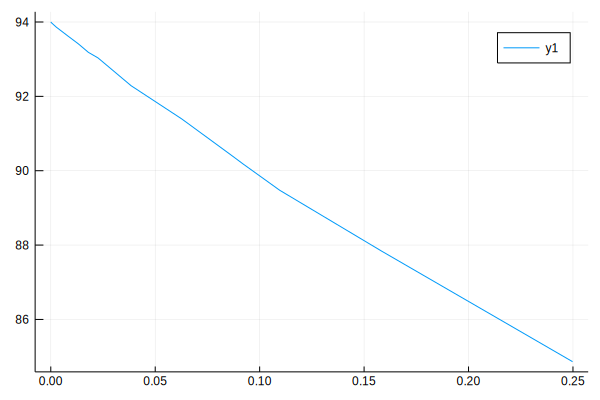

In [189]:
plot(x,y/(nrow(feature)*365*3))

In [197]:
y2=y/(nrow(feature)*365*3);

In [198]:
CSV.write("recidivism_and_cost_model_c.csv",DataFrame(Recidivism_rate=x,Cost=y2))

"recidivism_and_cost_model_c.csv"

In [190]:
nrow(feature)

9695

In [ ]:
## try to compute real cost

In [194]:
feature

9695×43 DataFrame. Omitted printing of 38 columns
│ Row  │ V6           │ V8           │ V7    │ V9           │ V10          │
│      │ Categorical… │ Categorical… │ Int64 │ Categorical… │ Categorical… │
├──────┼──────────────┼──────────────┼───────┼──────────────┼──────────────┤
│ 1    │ 4            │ 800          │ 1     │ 1            │ 2            │
│ 2    │ 4            │ 810          │ 1     │ 1            │ 1            │
│ 3    │ 4            │ 810          │ 1     │ 8            │ 1            │
│ 4    │ 4            │ 700          │ 3     │ 1            │ 8            │
│ 5    │ 4            │ 520          │ 1     │ 1            │ 8            │
│ 6    │ 4            │ 520          │ 1     │ 1            │ 8            │
│ 7    │ 4            │ 110          │ 1     │ 1            │ 1            │
│ 8    │ 4            │ 320          │ 1     │ 1            │ 3            │
│ 9    │ 4            │ 200          │ 1     │ 1            │ 3            │
│ 10   │ 4            │ 110          │ 1     │ 1            │ 8            │
⋮
│ 9685 │ 4            │ 500          │ 1     │ 1            │ 8            │
│ 9686 │ 4            │ 800          │ 1     │ 1            │ 8            │
│ 9687 │ 4            │ 800          │ 1     │ 1            │ 3            │
│ 9688 │ 4            │ 500          │ 1     │ 1            │ 8            │
│ 9689 │ 4            │ 600          │ 6     │ 1            │ 3            │
│ 9690 │ 4            │ 200          │ 5     │ 1            │ 1            │
│ 9691 │ 4            │ 200          │ 1     │ 1            │ 1            │
│ 9692 │ 4            │ 830          │ 1     │ 1            │ 3            │
│ 9693 │ 4            │ 600          │ 1     │ 1            │ 1            │
│ 9694 │ 4            │ 400          │ 1     │ 1            │ 1            │
│ 9695 │ 4            │ 830          │ 1     │ 1            │ 1            │